# <center>Covid Forecasts in Europe</center>
### <center>STA 141B Final Project Winter 2022</center>
#### <center>Group 28: Emily Tran, Ranjosh Waraich, & Krithin Arukala</center>

In this report, we analyzed the different factors that may have an effect on Covid-19 levels and compared the data on those factors between various European countries. Our report overview is as listed below:

__Introduction:__ Why does the Covid-19 forecast matter? What can we use to determine which response measures work and which don't? 

__Part 1:__ National Responses Across Europe

__Part 2:__ Plots on Factoral Correlation

__Part 3:__ Regression Analysis on Factors

__Part 4:__ Public Satisfaction

__Conclusion:__ Are the Covid-19 repsonse apporaches made by each country as effective as they are claiming them to be? Which response measures are the most effective? Are there possibly outside factors that may be affective response effectiveness? How can our findings be applied to our own communities? Where do we move on from here? 



## Introduction

Let's talk about the dataset as well as overall context for the report in this section.


In [52]:
# all imports
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import re
import nltk
from nltk.corpus import stopwords
import collections
from wordcloud import WordCloud, STOPWORDS


## Part 1: National Responses Across Europe



In [74]:
# This is the covid response data 
covid_response = "https://www.ecdc.europa.eu/sites/default/files/documents/response_graphs_data_2022-03-03.csv"
df1 = pd.read_csv(covid_response)

c = df1.iloc[:,0] # returns the column with all countries (with repeats)
countries = np.unique(df1.iloc[:,0]) # returns an array of all the unique countries, 30 total

r = df1.iloc[:,1] # returns the column with all reponse measures (with repeats)
responses = np.unique(df1.iloc[:,1]) # returns an array of all the unique responses, 66 total
res = df1["Response_measure"].tolist() # list of all response measures (w/ repeats)

freq_c = df1["Country"].value_counts() # number of response measures taken per country
freq_r = df1["Response_measure"].value_counts() # frequency of response measures taken


In [69]:
# looks at the types of responses
en_stops = set(stopwords.words('english'))

terms = [] # list of terms used in describing the response measures
for i in responses:
    words = re.findall('[A-Z][^A-Z]*', i)
    for w in words:
        if w.lower() not in en_stops: # and w not in terms:
            terms.append(w.lower())
            
t = pd.Series(terms)
#t.value_counts() # frequency of description terms


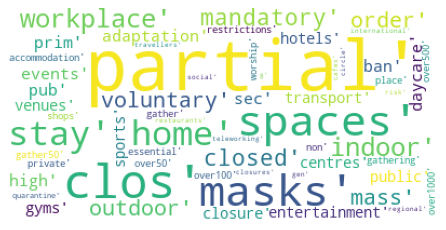

In [75]:
# WORDCLOUD WORKS !!!!!!
# wordcloud of similar terms across response measures

wordcloud = WordCloud(background_color = "white").generate(str(terms))
                                 
plt.imshow(wordcloud)
#plt.figure(figsize=(800,400))
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## Part 2: Plots on Factoral Correlation


In [76]:
# This is the covid statistics data
covid_testing = "https://opendata.ecdc.europa.eu/covid19/testing/csv/data.csv"
df2 = pd.read_csv(covid_testing)
df3 = df2.groupby("country").mean().reset_index() # sets average in all categories 


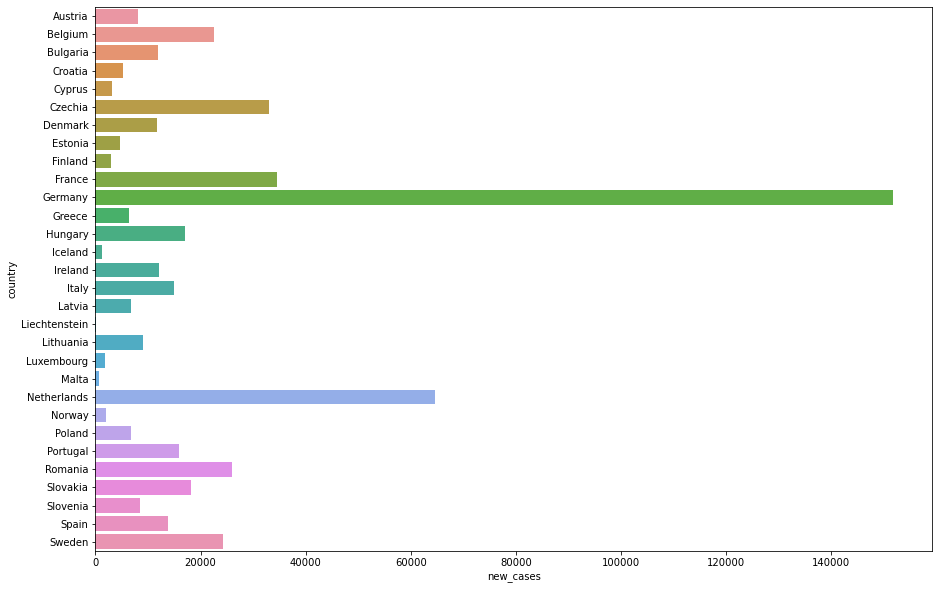

In [77]:
plt.figure(figsize=(15,10))
ax = sns.barplot(y = 'country', x = 'new_cases', data = df3, ci=None)

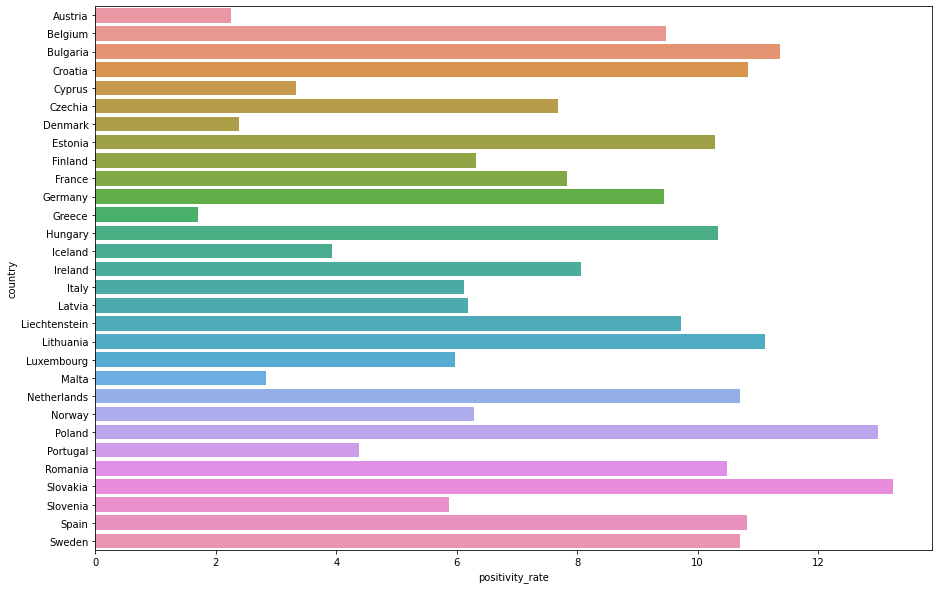

In [222]:
plt.figure(figsize=(15,10))
ax = sns.barplot(y = 'country', x = 'positivity_rate', data = df3, ci=None)

In [8]:
# this makes a gif of testting vs positivity
def render_frame(week, data):
    """Render a single frame (plot) in an animated visualization.
    
    Adapted from: https://ndres.me/post/matplotlib-animated-gifs-easily/
    """
    # Create a matplotlib figure to plot into.
    fig = plt.figure(figsize = (20, 10))
    
    # -------------------- Visualization Code
    data_subset = df2[df2["year_week"] == week]
    ax = sns.scatterplot(x = "testing_rate", y = "positivity_rate", size = "population", data = data_subset)
    ax.set_title(str(week))
    ax.set_xlabel("Testing Rate (per 100,000 population)")
    ax.set_ylabel("Positivity Rate (# confirmed cases/# tested)")
    #ax.set_xlim(0, 10)
    #ax.set_ylim(0, 95)

    # -------------------- End Visualization Code

    # Draw the figure and then convert it to a Numpy array.
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype = "uint8")
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    
    # Close the matplotlib figure (we're done with it)
    plt.close()
    return image

weeks = df2["year_week"].unique()
plots = [render_frame(w, df2) for w in weeks]

# Save a list of images as a GIF file.
imageio.mimsave("testing_vs_positivity.gif", plots, fps = 6)


![SegmentLocal](testing_vs_positivity.gif "segment")


## Part 3: Regression Analysis on Factors


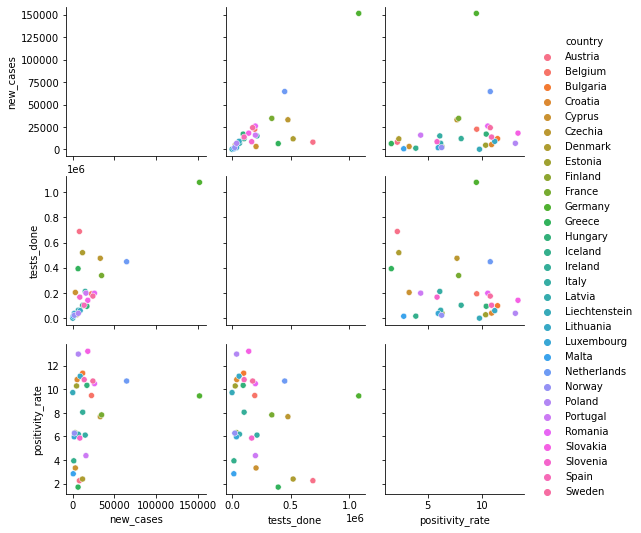

In [224]:
sns.pairplot(df3, vars = ['new_cases', 'tests_done', 'positivity_rate'], hue = 'country')

In [190]:
# ordinary least squares regression against positivity rate
import statsmodels.api as sm

y_pd = df3["positivity_rate"]
X_pd = df3.drop(columns = ["positivity_rate","country"])

df3_ols = sm.OLS(y_pd,X_pd) #Initialize the OLS 
df3_res = df3_ols.fit() # ols fitting
df3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        positivity_rate   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.474
Method:                 Least Squares   F-statistic:                              7.759
Date:                Mon, 14 Mar 2022   Prob (F-statistic):                    0.000296
Time:                        00:45:11   Log-Likelihood:                         -94.762
No. Observations:                  30   AIC:                                      197.5
Df Residuals:                      26   BIC:                                      203.1
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
new_cases        0.0006      0.000      3.368      0.002       0.000       0.001
tests_done   -4.051e-05   1.65e-05     -2.461      0.021   -7.43e-05   -6.68e-06
population   -4.529e-07   2.85e-07     -1.587      0.125   -1.04e-06    1.34e-07
testing_rate     0.0007      0.000      2.873      0.008       0.000       0.001
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.969
Skew:                          -0.388   Prob(JB):                        0.616
Kurtosis:                       2.586   Cond. No.                     4.10e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

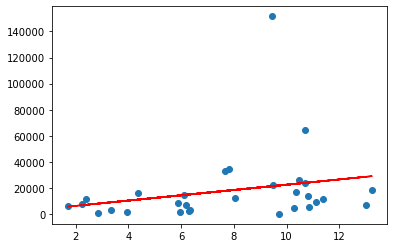

In [230]:
# linear model

data = df3  # load data set
X = data.iloc[:, 5].values.reshape(-1, 1)  # values converts it into a numpy array
Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

# X is positivity rate and Y is new cases
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

## Part 4: Public Satisfaction


In [60]:
# Data on satisfaction levels 
# https://www.europarl.europa.eu/at-your-service/en/be-heard/eurobarometer/public-opinion-in-the-eu-in-time-of-coronavirus-crisis
satisfaction = pd.read_excel("Covid Crisis_Volume A.xlsx", sheet_name = 3)

s = satisfaction.iloc[21,:].dropna() # percent satisfied
ns = satisfaction.iloc[23,:].dropna() # percent not satisfied
sc = satisfaction.iloc[7,:].dropna() # countries in data

sat = pd.DataFrame([sc.tolist(),s.tolist(),ns.tolist()]).transpose() # df on satisfaction
sat = sat.iloc[1: , :].reset_index()
sat.rename(columns={0:"country", 1:"satisfied", 2:"not_satisfied"}, inplace=True)
sat = sat.drop("index", axis=1)
sat.head()

,country,satisfied,not_satisfied
0,Austria,0.777,0.207
1,Belgium,0.565,0.394
2,Bulgaria,0.461,0.512
3,Croatia,0.682,0.288
4,Czech Republic,0.646,0.329


In [61]:
#countries
sim = np.intersect1d(sc.array, countries) # countries included in both datasets

# x, y, and z are subsets of each dataset containing only the overlaping countries
x = df3[df3['country'].isin(sim) == True] 
x = x.reset_index()

y = sat[sat['country'].isin(sim) == True]
y = y.reset_index()

z = df1["Country"].value_counts().to_frame().reset_index()
z.rename(columns={"index":"country", "Country":"number_of_responses"}, inplace=True)
z = z[z['country'].isin(sim) == True].sort_values("country").reset_index().drop("index", axis=1)

# final df with all data merged together
# only 20/33 countries overlap
final_df = pd.merge(pd.merge(x,y, on = "country"),z, on = "country").drop(["index_x", "index_y"], axis=1)
final_df.head()

,country,new_cases,tests_done,population,testing_rate,positivity_rate,satisfied,not_satisfied,number_of_responses
0,Austria,8045.626277,688822.624818,2.140039e+06,37282.734627,2.245560,0.777,0.207,84
1,Belgium,22482.470588,194436.214533,6.644171e+06,3248.850287,9.477127,0.565,0.394,78
2,Bulgaria,11935.869565,99747.532609,6.951482e+06,1434.910320,11.375990,0.461,0.512,53
3,Croatia,5328.352617,41241.903581,1.429800e+06,10064.267738,10.833110,0.682,0.288,40
4,Denmark,11747.105376,520671.776344,2.263948e+06,26295.571918,2.384333,0.855,0.125,78


<AxesSubplot:xlabel='number_of_responses', ylabel='satisfied'>

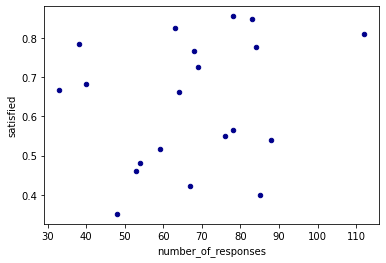

In [179]:
# various scatter plots
final_df.plot.scatter(x = "number_of_responses", y = "satisfied", c = "DarkBlue")

<AxesSubplot:xlabel='positivity_rate', ylabel='satisfied'>

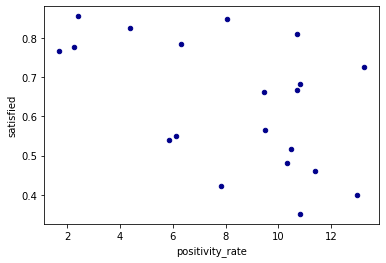

In [180]:
final_df.plot.scatter(x = "positivity_rate", y = "satisfied", c = "DarkBlue")

<AxesSubplot:xlabel='testing_rate', ylabel='satisfied'>

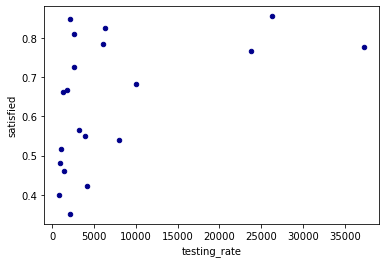

In [182]:
final_df.plot.scatter(x = "testing_rate", y = "satisfied", c = "DarkBlue")

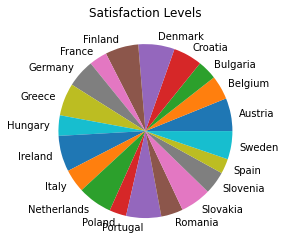

In [187]:
# pie chart displaying satisfaction levels
plt.pie(final_df["satisfied"], labels = final_df["country"])#,colors = ['#F0F8FF','#E6E6FA','#B0E0E6','#7B68EE','#483D8B'])
#Adding the aesthetics
plt.title('Satisfaction Levels')
#Show the plot
plt.show()

## Conclusion


In [53]:
#conda install -c https://conda.anaconda.org/conda-forge wordcloud

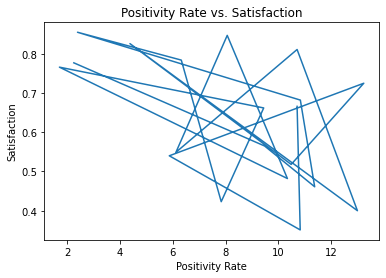

In [184]:
# line chart?
plt.plot(final_df["positivity_rate"], final_df["satisfied"]) 
#Adding the aesthetics
plt.title('Positivity Rate vs. Satisfaction')
plt.xlabel('Positivity Rate')
plt.ylabel('Satisfaction') 
#Show the plot
plt.show()